In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [193]:
days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Mon2']
df = pd.read_csv('data.csv', names = days)

In [194]:
# replace absent with the maximum arrival time possible, 6:00 pm, to represent "missed class time"
df['Mon'].loc[df['Mon'].str.contains('absent')] = None

In [195]:
np.array(df).shape

(23, 6)

In [196]:
all_times = np.array(df).reshape(1,23*6)
all_times = pd.DataFrame(all_times.T)

In [197]:
def to_hours(time_as_string):
    try:
        time = time_as_string.split(':')
        time[1] = time[1][:2]
        time = [float(x) for x in time]
        return time[0] + time[1]/60
    except:
        return None

all_times = all_times.applymap(to_hours)


In [198]:
all_times.insert(0, 'day', '')


In [199]:
all_times.columns = ['day','time']
all_times['day'] = all_times.index % 6

In [200]:
all_times = all_times.dropna()
all_times

,day,time
0,0,8.933333
1,1,9.000000
2,2,7.750000
3,3,7.750000
4,4,8.083333
5,5,7.750000
6,0,8.666667
7,1,8.666667
8,2,8.500000
9,3,8.500000


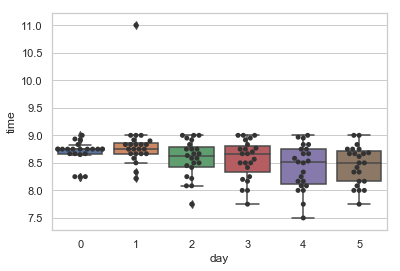

In [202]:
sns.set(style = 'whitegrid')
ax = sns.boxplot(x='day', y= 'time', data = all_times)
ax = sns.swarmplot(x="day", y="time", data=all_times, color=".2")

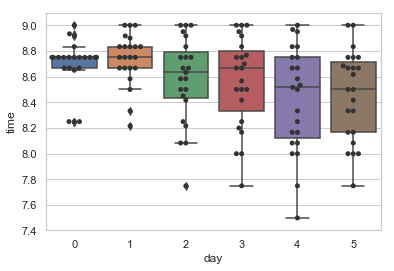

In [203]:
no_outlier = all_times.loc[all_times['time']<10]
ax = sns.boxplot(x='day', y= 'time', data = no_outlier)
ax = sns.swarmplot(x="day", y="time", data=no_outlier, color=".2")